### Student Information
Name:龔祺竣

Student ID:D1124181010

GitHub ID:anku0910

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [221]:
### Begin Assignment Here

## 1. The Data

Nothing.

## 2. Data Preparation

In [222]:
import pandas as pd
import numpy as np
from sklearn.utils import Bunch

data = pd.read_csv('senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')  # Load
categories = data['sentiment'].unique()  # Extract sentiment categories

data['sentiment'] = pd.Categorical(data['sentiment'], categories=categories)  # Convert sentiment column to categorical
data['sentiment'] = data['sentiment'].cat.codes  # Convert to numerical code

X = data['comment'].values 
y = data['sentiment'].values  

sentiment1 = Bunch(data=X, target=y, feature_names=['text'], target_names=categories)  # Create a structured dataset for view
sentiment1.data[0:2]

array(['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
       'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel'],
      dtype=object)

In [223]:
for t in sentiment1.target[:10]:
    print(sentiment1.target_names[t])

not nostalgia
nostalgia
nostalgia
not nostalgia
nostalgia
nostalgia
nostalgia
nostalgia
not nostalgia
not nostalgia


In [224]:
len(sentiment1.data)

1500

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [225]:
# Answer here
for text in sentiment1.data[:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [226]:
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(sentiment1), columns= ['text'])

In [227]:
len(X)

1500

In [228]:
X[0:8]

,text
0,He was a singer with a golden voice that I lov...
1,The mist beautiful voice ever I listened to hi...
2,I have most of Mr. Reeves songs. Always love ...
3,30 day leave from 1st tour in Viet Nam to conv...
4,listening to his songs reminds me of my mum wh...
5,"Every time I heard this song as a child, I use..."
6,"My dad loved listening to Jim Reeves, when I w..."
7,i HAVE ALSO LISTENED TO Jim Reeves since child...


### Adding Columns

In [229]:
X['category'] = sentiment1.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, sentiment1))

In [230]:
X[0:10]

,text,category,category_name
0,He was a singer with a golden voice that I lov...,0,not nostalgia
1,The mist beautiful voice ever I listened to hi...,1,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia
4,listening to his songs reminds me of my mum wh...,1,nostalgia
5,"Every time I heard this song as a child, I use...",1,nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",1,nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,nostalgia
8,Wherever you are you always in my heart,0,not nostalgia
9,Elvis will always be number one no one can com...,0,not nostalgia


### 3.2 Familiarizing yourself with the Data


In [231]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
5,"Every time I heard this song as a child, I use...",nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,Wherever you are you always in my heart,not nostalgia
9,Elvis will always be number one no one can com...,not nostalgia


In [232]:
X[-10:]

,text,category,category_name
1490,"He really isn't my cup of tea, but some of his...",0,not nostalgia
1491,real music...how i miss those days...brings ba...,1,nostalgia
1492,i used to cry over this song cause i had a boy...,1,nostalgia
1493,"He really has that ""love you like a brother"" l...",0,not nostalgia
1494,That's funny. But Leo really is a nice guy. He...,0,not nostalgia
1495,"i don't know!..but the opening of the video,.....",0,not nostalgia
1496,it's sad this is such a beautiful song when yo...,0,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",0,not nostalgia
1498,I was born in 1954 and started to be aware of ...,1,nostalgia
1499,This is the first CD I bought after my marriag...,1,nostalgia


In [233]:
# using loc (by label)
X.loc[:10, 'text']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [234]:
#Answer here
print(X[X['category_name']!='nostalgia'].iloc[::10][0:2])

                                                 text  category  category_name
0   He was a singer with a golden voice that I lov...         0  not nostalgia
24  I like the part I'm a steam roller baby guaran...         0  not nostalgia


### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [235]:
# Answer here
print(X[X['category_name']=='nostalgia'].iloc[::10][0:5])

                                                 text  category category_name
1   The mist beautiful voice ever I listened to hi...         1     nostalgia
18  My Grandparents had a pub in the 1970's, this ...         1     nostalgia
32  I remember my Mom listening to Jim over and ov...         1     nostalgia
50  If I remember correctly, this song came out af...         1     nostalgia
71  Gosh does this bring back memories. Nearly eve...         1     nostalgia


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [236]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [237]:
# Answer here
X.isnull().apply(lambda X: dmh.check_missing_values(X),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### >>> **Exercise 5 (take home)** 
$Hint$ :  why `.isnull()` didn't work?

### 4.2 Dealing with Duplicate Data

In [238]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [239]:
sum(X.duplicated())

1

In [240]:
sum(X.duplicated('text'))

1

In [241]:
len(X)

1500

In [242]:
X.drop_duplicates(keep="first", inplace=True) 

In [243]:
len(X)

1499

In [244]:
sum(X.duplicated())

0

## 5.  Data Preprocessing

In [245]:
X.category_name.value_counts()

category_name
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

### 5.1 Sampling

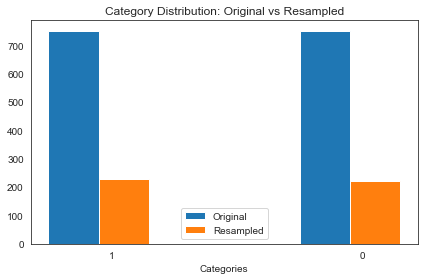

In [246]:
X_resampled = X.sample(n=450)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to plot the category distribution for both original and resampled data 
def plot_category_distribution(original_data, resampled_data):
    """ 
    Function to plot the category distribution for both original and resampled data 
    """
    # Convert data to DataFrame
    original_df = pd.DataFrame(original_data, columns=["category"])
    resampled_df = pd.DataFrame(resampled_data, columns=["category"])

    # Calculate value counts for original and resampled data
    original_count = original_df['category'].value_counts()
    resampled_count = resampled_df['category'].value_counts()

    # Define categories and index for plotting
    categories = original_count.index.tolist()  # Extract categories from the data
    index = np.arange(len(categories))

    # Create a bar plot for original and resampled data
    plt.bar(index, original_count.values, width=0.2, label='Original', align='center')
    plt.bar(index + 0.2, resampled_count.values, width=0.2, label='Resampled', align='center')

    # Set x-axis ticks and labels
    plt.xticks(index + 0.15, categories)
    plt.xlabel('Categories')
    plt.title('Category Distribution: Original vs Resampled')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_category_distribution(X, X_resampled)


### 5.2 Feature Creation

In [247]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
ngram_range=(1,1) 
X['unigrams'] = X['text'].apply(CountVectorizer(ngram_range=ngram_range).build_analyzer()) 
# Use built-in tokenizer 
list(X[0:1]['unigrams'])

[['he',
  'was',
  'singer',
  'with',
  'golden',
  'voice',
  'that',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  'although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  'but',
  'can',
  'vouch',
  'for',
  'jim',
  'reeves',
  'all',
  'the',
  'time',
  'you',
  'feel',
  'relaxed',
  'emotional',
  'and',
  'loving',
  'thank',
  'you',
  'lord',
  'for',
  'his',
  'life']]

In [248]:
X[0:4]

,text,category,category_name,unigrams
0,He was a singer with a golden voice that I lov...,0,not nostalgia,"[he, was, singer, with, golden, voice, that, l..."
1,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[the, mist, beautiful, voice, ever, listened, ..."
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[have, most, of, mr, reeves, songs, always, lo..."
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, viet, na..."


### 5.3 Feature subset selection

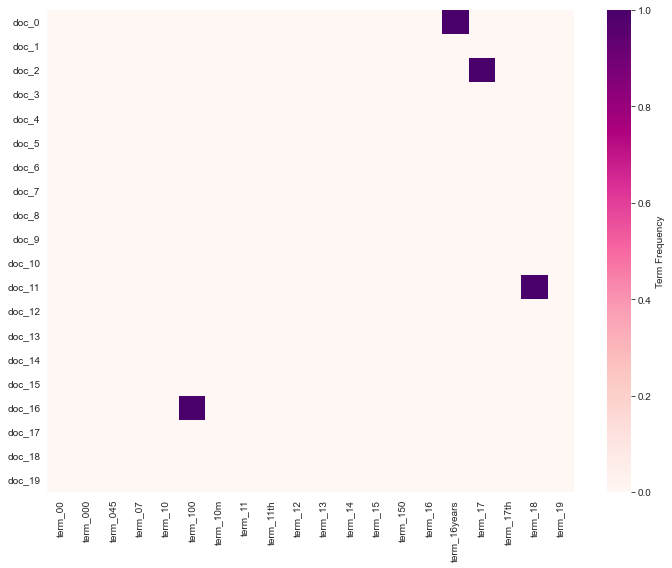

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initialize and fit the CountVectorizer
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(X['text'])  # Fit with the 'text' column of X

# Extract feature names and index labels
plot_x = ["term_" + str(i) for i in vectorizer.get_feature_names_out()[0:20]]
plot_y = ["doc_" + str(i) for i in range(20)]  # Generate labels for first 20 documents
plot_z = tdm[0:20, 0:20].toarray()  # Select first 20 documents and first 20 terms

# Create DataFrame for visualization
tdm_df = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot heatmap
plt.subplots(figsize=(10, 8))
sns.heatmap(tdm_df, cmap='RdPu', vmin=0, vmax=tdm_df.max().max(), annot=False, cbar_kws={'label': 'Term Frequency'})
plt.tight_layout()
plt.show()


### 5.4 Atrribute Transformation / Aggregation

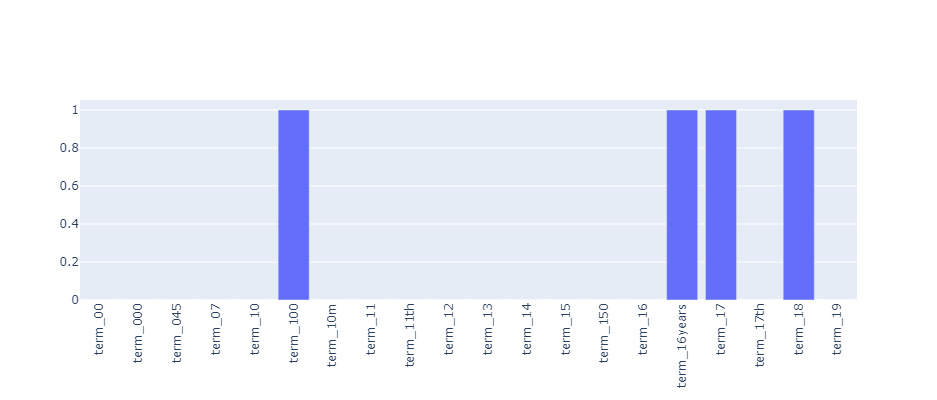

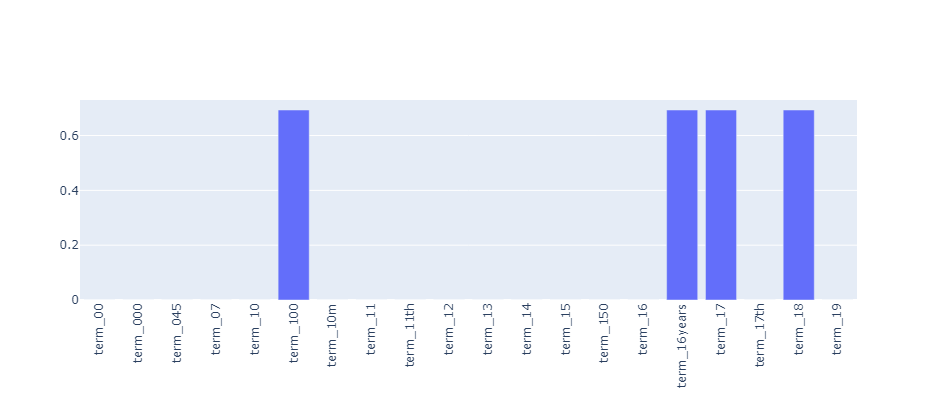

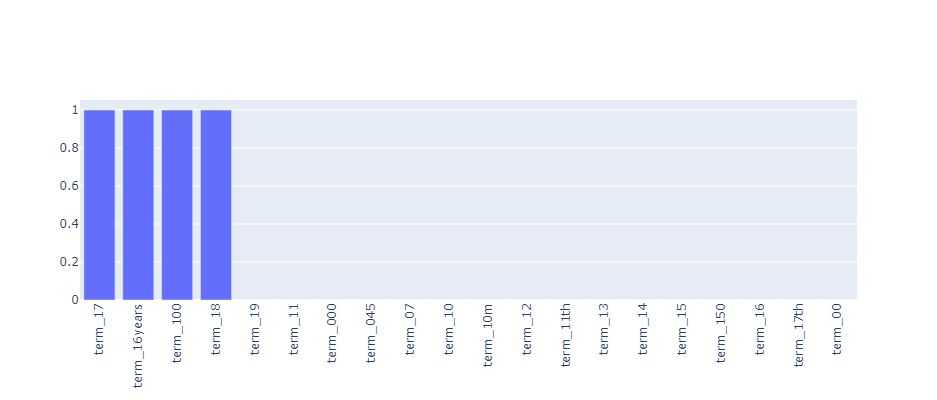

In [250]:
import plotly.graph_objects as go

# Function to plot term frequencies with optional log scale and sorting
def plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=None):
    term_frequencies = tdm_df.sum(axis=0).to_numpy()  # Sum term frequencies across documents
    terms = tdm_df.columns.to_list()  # Extract column names (terms)
    
    x_values = np.asarray(terms)
    y_values = term_frequencies
    
    # Apply log scale if needed
    if logScale:
        y_values = np.log(y_values + 1)  # Log scale (add 1 to avoid log(0))

    # Sort terms based on frequency if ascending/descending is specified
    if ascending is not None:
        sorted_indices = np.argsort(y_values)
        if not ascending:
            sorted_indices = sorted_indices[::-1]  # Reverse for descending order
        x_values = x_values[sorted_indices]
        y_values = y_values[sorted_indices]

    # Plot term frequencies within the specified range
    fig = go.Figure(go.Bar(x=x_values[start_range:end_range], y=y_values[start_range:end_range]))
    
    # Update layout for better readability and interactivity
    fig.update_layout(
        width=700,
        height=400,
        xaxis=dict(tickangle=-90),
        sliders=[{
            'active': 0,
            'currentvalue': {"prefix": "Range: "},
            'steps': [
                {'label': f'{i}-{i+end_range-1}',
                 'method': 'update',
                 'args': [{'x': [x_values[i:i+end_range]], 'y': [y_values[i:i+end_range]]}]}
                for i in range(0, len(x_values), end_range)  # Step through terms in batches of `end_range`
            ]
        }]
    )
    
    fig.show()
    
plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=None)  # Basic plot
plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=True, ascending=None)  # Log scale plot
plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=False)  # Sorted by frequency


### Finding frequent patterns for each category

#### Converting texts for each category to a term-document matrix

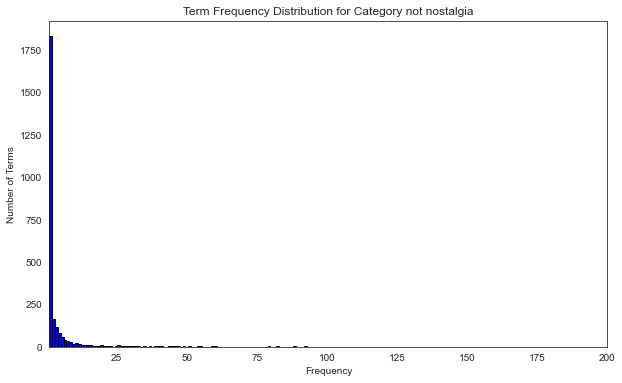

In [251]:
#Create separate DataFrames for each category
category_dfs = {}  # Dictionary to store DataFrames for each category
for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category
for category in categories:
    term_document_dfs[category] = dmh.create_term_document_df(category_dfs[category]['text'])
category_name = categories[0]
category_word_counts = term_document_dfs[category_name].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(category_word_counts, bins=700, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {category_name}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()    

#### bottom 1% and top 5% words from term-document matrix

Plot of Term Frequencies for Category not nostalgia


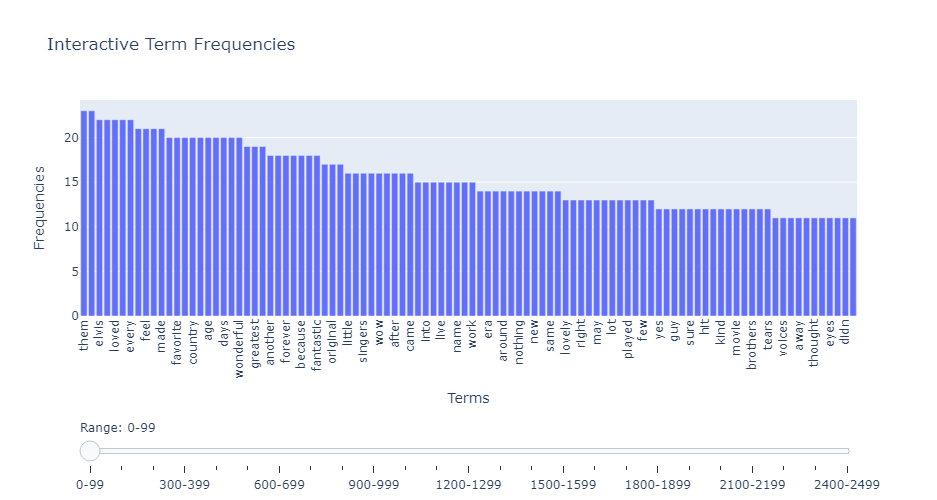



Plot of Term Frequencies for Category nostalgia


In [252]:
import helpers.text_analysis as ta

filt_term_document_dfs = {}
stop_words_dict = {}

# Step 1: Apply filtering and collect stop words for all categories in one go
for category in categories:
    filt_term_document_dfs[category], stop_words_dict[category] = dmh.filter_top_bottom_words_by_sum(
        term_document_dfs[category], verbose=False)

# Step 2: Aggregate stop words into a single list for later use
stop_words_list = [item for sublist in stop_words_dict.values() for item in sublist]

# Step 3: Plot term frequencies for each filtered category
for category_name, filt_tdm in filt_term_document_dfs.items():
    print(f"Plot of Term Frequencies for Category {category_name}")
    ta.plot_term_frequencies(
        filt_term_document_dfs[category_name], start_range=0, end_range=100, logScale=False, ascending=False)
    print("\n")

# Explanation:
# The dictionary comprehension handles filtering in one line, creating filt_term_document_dfs and populating stop_words_dict.
# sum is used to concatenate stop word lists, reducing nested list comprehensions.
# plot_term_frequencies is called directly in the loop for each category without redundant references.


In [253]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def load_patterns(file_path):
    with open(file_path, 'r') as f:
        return [line.split(":")[0].strip() for line in f.readlines()]

nostalgia_data = load_patterns("freq_patterns_nostalgia_minSup9.txt")
not_nostalgia_data = load_patterns("freq_patterns_not_nostalgia_minSup9.txt")

# Load patterns
common = set(nostalgia_data) & set(not_nostalgia_data)
unique_nostalgia = set(nostalgia_data) - common
unique_not_nostalgia = set(not_nostalgia_data) - common

emotional_words = [ "sad","memory", "happy", "cry", "tears", "gone", "feel"]
temporal_words = ["youth", "yesterday", "today", "growing", "1963", "forever"]

def analyze(words, target):
    return {word: words.count(word) for word in target if word in words}

nostalgia_emotions = analyze(nostalgia_data, emotional_words)
not_nostalgia_emotions = analyze(not_nostalgia_data, emotional_words)

def WordCloud(freq, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(6, 3))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# result
WordCloud(nostalgia_emotions, "Nostalgia - Emotional Words")
WordCloud(not_nostalgia_emotions, "Not Nostalgia - Emotional Words")

TypeError: WordCloud() got an unexpected keyword argument 'width'

In [ ]:
print(data.columns)
print(data.head())

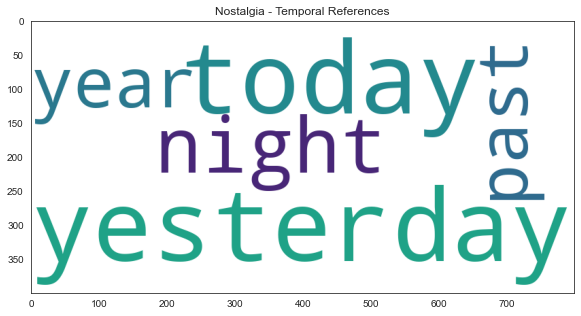

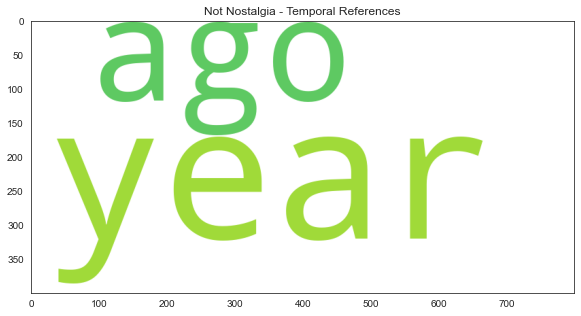

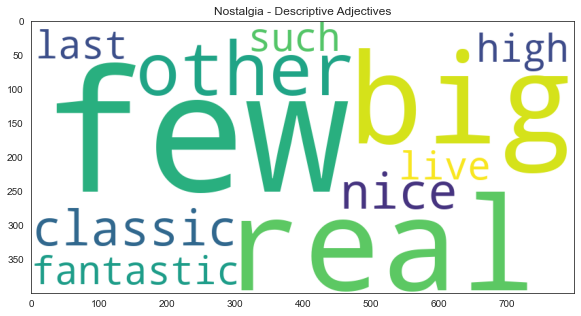

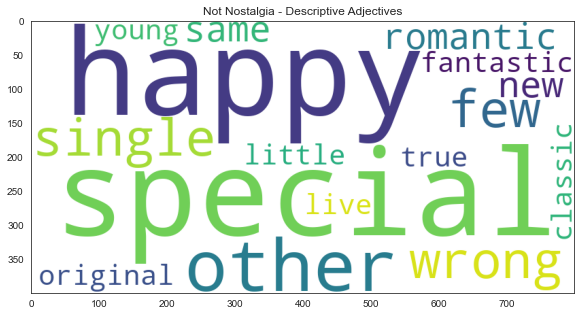

N Emotional Words: {'positive': 15, 'negative': 9, 'joy': 10, 'sadness': 6, 'anger': 3, 'anticipation': 7, 'trust': 12, 'fear': 3, 'surprise': 3, 'disgust': 1}
NN Emotional Words: {'positive': 18, 'negative': 5, 'joy': 16, 'sadness': 2, 'anger': 3, 'anticipation': 11, 'trust': 14, 'fear': 1, 'surprise': 5, 'disgust': 1}

N Temporal References: {'yesterday': 1, 'today': 1, 'night': 1, 'year': 1, 'past': 1}
NN Temporal References: {'year': 1, 'ago': 1}

NN Descriptive Adjectives: [('few', 1), ('real', 1), ('big', 1), ('other', 1), ('classic', 1), ('nice', 1), ('fantastic', 1), ('last', 1), ('live', 1), ('high', 1)]
NN Descriptive Adjectives: [('special', 1), ('happy', 1), ('other', 1), ('single', 1), ('wrong', 1), ('few', 1), ('romantic', 1), ('new', 1), ('same', 1), ('original', 1)]


In [254]:
from nltk.corpus import wordnet
from nrclex import NRCLex
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load patterns from files
def load_patterns(file_path):
    with open(file_path, 'r') as f:
        return [line.split(":")[0].strip() for line in f]

nostalgia_data = load_patterns("freq_patterns_nostalgia_minSup9.txt")
not_nostalgia_data = load_patterns("freq_patterns_not_nostalgia_minSup9.txt")

# Analyze emotional words with NRCLex
def analyze_emotions(words):
    emotions = {emotion: [] for emotion in ['positive', 'negative', 'joy', 'sadness', 'anger', 
                                            'anticipation', 'trust', 'fear', 'surprise', 'disgust']}
    for word in words:
        analysis = NRCLex(word)
        for emotion in emotions:
            if emotion in analysis.raw_emotion_scores:
                emotions[emotion].append(word)
    return {k: len(v) for k, v in emotions.items()}

# Count temporal words
temporal_words = ["yesterday", "today", "tomorrow", "night", "year", "past", "future", "now", "ago"]

def count_temporal(words, temporal_list):
    return {word: words.count(word) for word in temporal_list if word in words}

nostalgia_time = count_temporal(nostalgia_data, temporal_words)
not_nostalgia_time = count_temporal(not_nostalgia_data, temporal_words)

# Extract adjectives /using POS tagging
def extract_adj(words):
    all_adjectives = []
    for phrase in words:
        tokens = word_tokenize(phrase)
        tags = pos_tag(tokens)
        all_adjectives.extend([word for word, tag in tags if tag == 'JJ'])  # 'JJ' is the POS tag for adjectives
    return Counter(all_adjectives)

nostalgia_adjectives = extract_adj(nostalgia_data)
not_nostalgia_adjectives = extract_adj(not_nostalgia_data)

# Visual
def show_wordcloud(word_freq, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.title(title)
    plt.show()

# Gen clouds
show_wordcloud(nostalgia_time, "Nostalgia - Temporal References")
show_wordcloud(not_nostalgia_time, "Not Nostalgia - Temporal References")
show_wordcloud(nostalgia_adjectives, "Nostalgia - Descriptive Adjectives")
show_wordcloud(not_nostalgia_adjectives, "Not Nostalgia - Descriptive Adjectives")

# Findings
print("N Emotional Words:", analyze_emotions(nostalgia_data))
print("NN Emotional Words:", analyze_emotions(not_nostalgia_data))
print("\nN Temporal References:", nostalgia_time)
print("NN Temporal References:", not_nostalgia_time)
print("\nNN Descriptive Adjectives:", nostalgia_adjectives.most_common(10))
print("NN Descriptive Adjectives:", not_nostalgia_adjectives.most_common(10))


#### Converting the filtered term-document matrix to transactional database

In [255]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in filt_term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

#### Printing and visualizing stats for transactional database (for determining support threshold)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


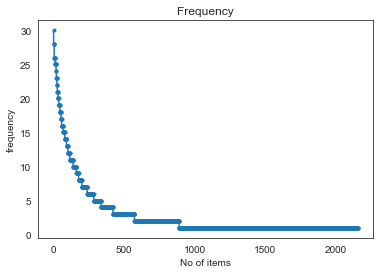

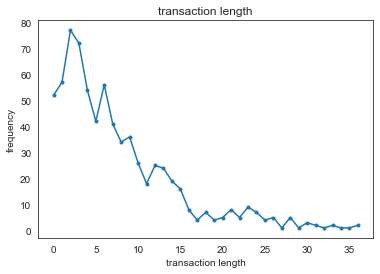

In [256]:
from PAMI.extras.dbStats import TransactionalDatabase
obj = TransactionalDatabase.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


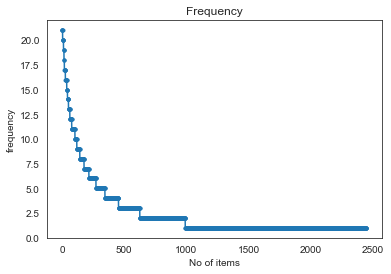

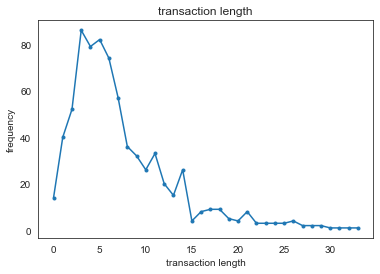

In [257]:
db_obj = TransactionalDatabase.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
db_obj.run()
db_obj.printStats()
db_obj.plotGraphs()

#### Apply FPGrowth algorithms to finding frequent pattern

In [258]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# nostalgia data
fp_obj_nostalgia = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=9)
fp_obj_nostalgia.mine()
print('Total Patterns Count for Nostalgia:', len(fp_obj_nostalgia.getPatternsAsDataFrame()))
print('Runtime for Nostalgia:', fp_obj_nostalgia.getRuntime())
fp_obj_nostalgia.save('freq_patterns_nostalgia_minSup9.txt')

ta.plot_frequent_patterns(patterns_df_nostalgia,ascending=9)

# not nostalgia data
fp_obj_not_nostalgia = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=9)
fp_obj_not_nostalgia.mine()
print('Total Patterns Count for Not Nostalgia:', len(fp_obj_not_nostalgia.getPatternsAsDataFrame()))
print('Runtime for Not Nostalgia:', fp_obj_not_nostalgia.getRuntime())
fp_obj_not_nostalgia.save('freq_patterns_not_nostalgia_minSup9.txt')

ta.plot_frequent_patterns(patterns_df_not_nostalgia,ascending=False)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total Patterns Count for Nostalgia: 180
Runtime for Nostalgia: 0.012991905212402344


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total Patterns Count for Not Nostalgia: 144
Runtime for Not Nostalgia: 0.007999897003173828


### For each category, filter the patterns to keep only the unique ones

In [259]:
import pandas as pd

dfs = [patterns_df_nostalgia, patterns_df_not_nostalgia]
pattern_freq = {}

# Count pattern occurrences across both files
for df in dfs:
    for pattern in df['Patterns']:
        pattern_freq[pattern] = pattern_freq.get(pattern, 0) + 1

# Filter out something that appearing more than once
unique_only = {pattern for pattern, count in pattern_freq.items() if count == 1}

# Compute total patterns and discarded ones
total_count = sum(len(df) for df in dfs)
discarded_count = total_count - len(unique_only)

# Keep only unique patterns in final DataFrame
filtered_data = [df[df['Patterns'].isin(unique_only)] for df in dfs]
final_df = pd.concat(filtered_data)

ta.plot_frequent_patterns(final_df)

### Transform the texts into the frequency-based term-document matrix

In [260]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column
tokenizer = CountVectorizer().build_analyzer()

# Generate term-document matrix for the 'text' column with consistent indexing
tdm_df = dmh.create_term_document_df(X['text'], vectorizer=CountVectorizer(), index=X.index)
tdm_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform the texts into the TF-IDF-based term-document matrix

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Generate tf-idf term-document matrix with consistent indexing for merging
tfidf_tdm_df = dmh.create_term_document_df(X['text'], vectorizer=TfidfVectorizer(), index=X.index)
tfidf_tdm_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Transform the unique patterns into the 0/1 patterm-document matrix

In [262]:
# Tokenize text into sets of words
X['words'] = X['text'].apply(tokenizer).apply(set)

# Initialize pattern matrix with zeroes
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Fill pattern matrix: set to 1 if all pattern words exist in text
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['words'].apply(lambda w: int(pattern_words.issubset(w)))

pattern_matrix

Patterns,its,player,left,together,along,tv,until,records,place,karen,...,greatest,makes,young,days,wonderful,thanks,ve,elvis,every,loved
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Concatenate the frequence-based term-document matrix and the pattern matrix to augment the features

In [263]:
# Combine the term-document matrix with the pattern matrix to expand features
augmented_tdm_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_tdm_df

,00,000,045,07,10,100,10m,11,11th,12,...,greatest,makes,young,days,wonderful,thanks,ve,elvis,every,loved
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Concatenate the tf-idf-based term-document matrix and the pattern matrix to augment the features

In [264]:
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_tfidf_tdm_df = pd.concat([tfidf_tdm_df, pattern_matrix], axis=1)
augmented_tfidf_tdm_df

,00,000,045,07,10,100,10m,11,11th,12,...,greatest,makes,young,days,wonderful,thanks,ve,elvis,every,loved
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


### 5.5 Dimensionality Reduction

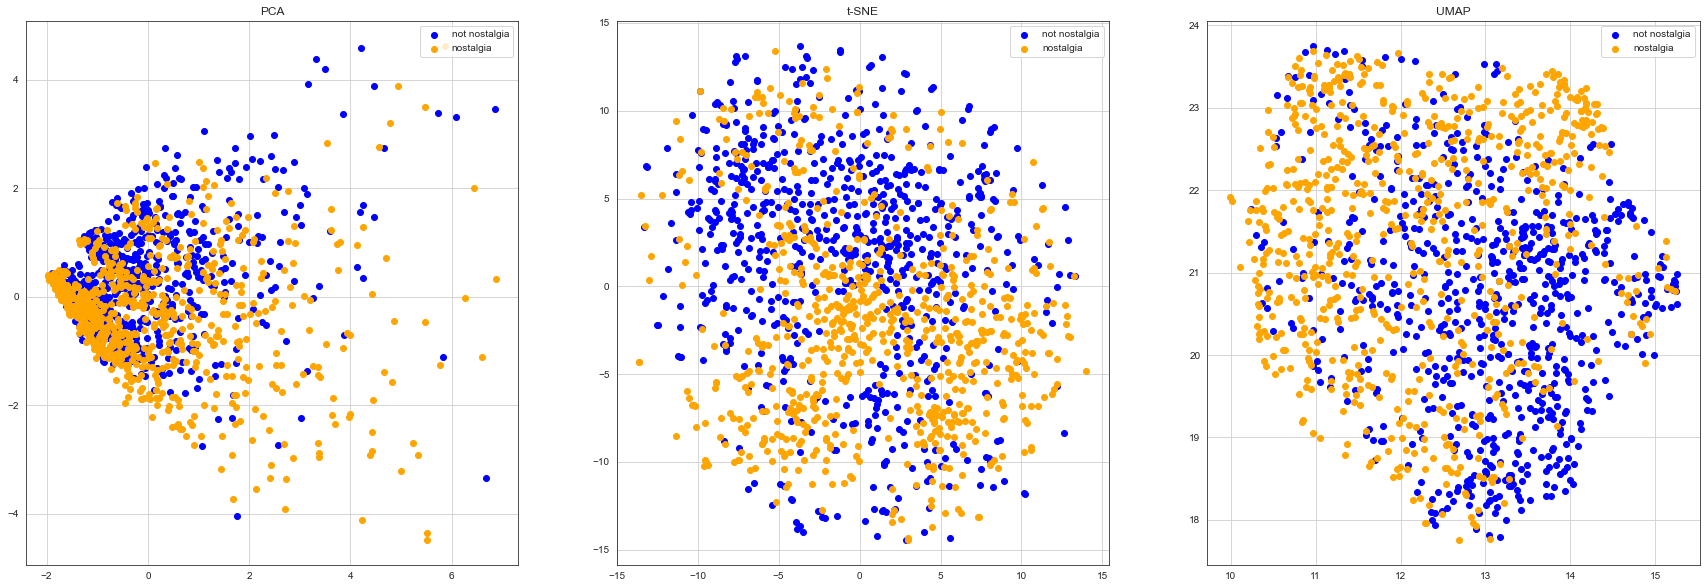

In [265]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function for 2D scatter plots
def plot_scatter_2d(ax, data_reduced, title, colors, categories):
    for color, category in zip(colors, categories):
        x_vals = data_reduced[X['category_name'] == category, 0]
        y_vals = data_reduced[X['category_name'] == category, 1]
        ax.scatter(x_vals, y_vals, c=color, marker='o', label=category)   
    ax.grid()
    ax.set_title(title)
    ax.legend(loc='upper right')

# Function for 3D scatter plots
def plot_scatter_3d(ax, data_reduced, title, colors, categories):
    for color, category in zip(colors, categories):
        x_vals = data_reduced[X['category_name'] == category, 0]
        y_vals = data_reduced[X['category_name'] == category, 1]
        z_vals = data_reduced[X['category_name'] == category, 2]
        ax.scatter(x_vals, y_vals, z_vals, c=color, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.legend(loc='upper right')

# Apply PCA, t-SNE, and UMAP to term-document data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plotting PCA, t-SNE, and UMAP in subplots
colors = ['blue','orange']  # Colors for categories
categories = X['category_name'].unique()  # Unique categories for labeling

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Subplots for the 3 reduction methods

# Plot results for each method
plot_scatter_2d(axes[0], X_pca_tdm, 'PCA', colors=colors, categories=categories)
plot_scatter_2d(axes[1], X_tsne_tdm, 't-SNE', colors=colors, categories=categories)
plot_scatter_2d(axes[2], X_umap_tdm, 'UMAP', colors=colors, categories=categories)

plt.show()

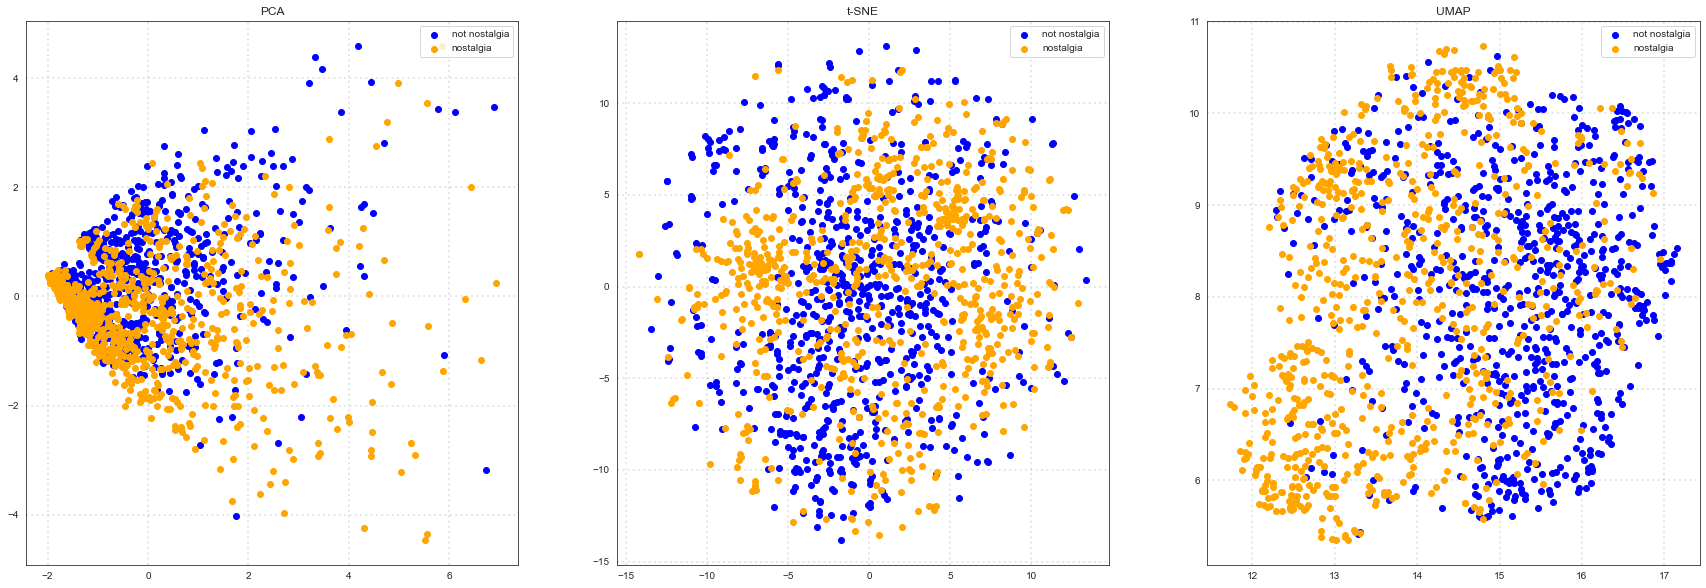

In [266]:
# Apply dimensionality reduction to the augmented frequency-based term-document matrix and keep 2 components only
# Function for 2D scatter plots
def plot_scatter_2d(ax, data_reduced, title, colors, categories):
    for color, category in zip(colors, categories):
        x_vals = data_reduced[X['category_name'] == category, 0]
        y_vals = data_reduced[X['category_name'] == category, 1]
        ax.scatter(x_vals, y_vals, c=color, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.legend(loc='upper right')

# Apply PCA, t-SNE, and UMAP to augmented term-document matrix
X_pca_tdm_aug = PCA(n_components=2).fit_transform(augmented_tdm_df.values)
X_tsne_tdm_aug = TSNE(n_components=2).fit_transform(augmented_tdm_df.values)
X_umap_tdm_aug = umap.UMAP(n_components=2).fit_transform(augmented_tdm_df.values)

# Plotting PCA, t-SNE, and UMAP in subplots
colors = ['blue','orange']  # Colors for categories
categories = X['category_name'].unique()  # Unique categories for labeling

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Subplots for the 3 reduction methods

# Plot results for each method
plot_scatter_2d(axes[0], X_pca_tdm_aug, 'PCA', colors=colors, categories=categories)
plot_scatter_2d(axes[1], X_tsne_tdm_aug, 't-SNE', colors=colors, categories=categories)
plot_scatter_2d(axes[2], X_umap_tdm_aug, 'UMAP', colors=colors, categories=categories)

plt.show()

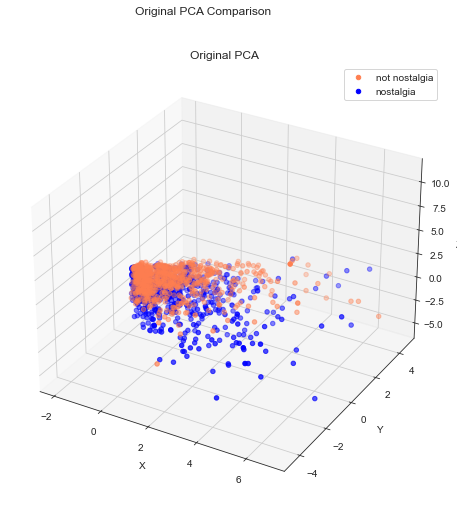

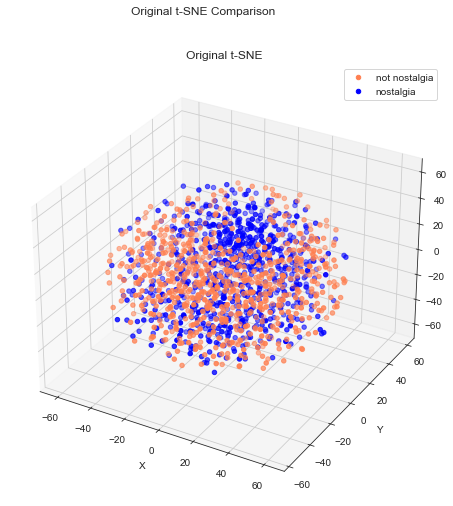

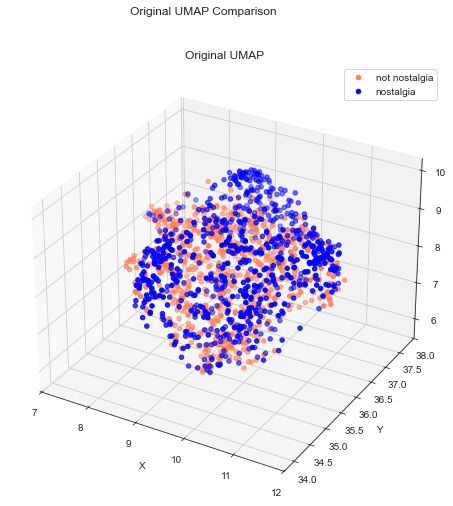

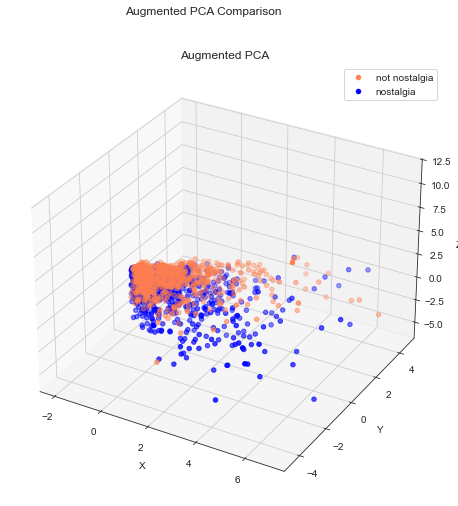

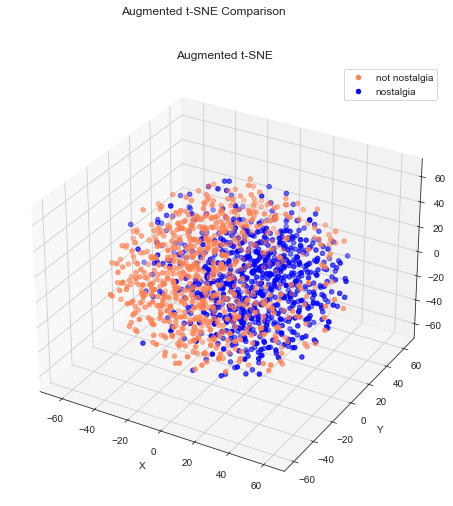

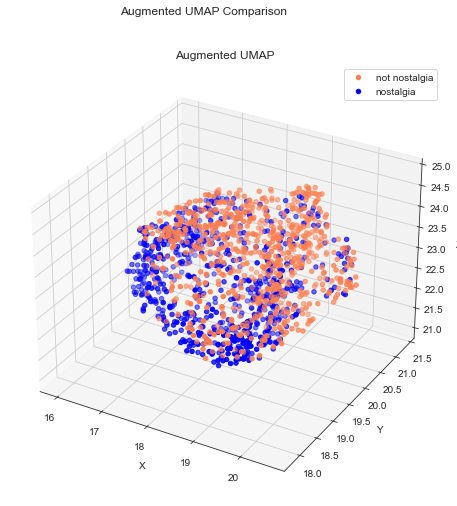

In [267]:
# Apply dimensionality reduction to the frequency-based term-document matrix with 3 components
X_pca = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Apply dimensionality reduction to the augmented term-document matrix with 3 components
X_pca_aug = PCA(n_components=3).fit_transform(augmented_tdm_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_tdm_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_tdm_df.values)

colors = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# Function to create 3D scatter plot
def plot_scatter_3d(ax, data, title, colors, categories):
    for color, category in zip(colors, categories):
        xs = data[X['category_name'] == category, 0]
        ys = data[X['category_name'] == category, 1]
        zs = data[X['category_name'] == category, 2]
        ax.scatter(xs, ys, zs, c=color, marker='o', label=category)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create and display 3D scatter plots for the original and augmented matrices
for data, title_prefix in [(X_pca, "Original PCA"), (X_tsne, "Original t-SNE"), (X_umap, "Original UMAP"),
                           (X_pca_aug, "Augmented PCA"), (X_tsne_aug, "Augmented t-SNE"), (X_umap_aug, "Augmented UMAP")]:
    fig = plt.figure(figsize=(24, 8))
    fig.suptitle(f'{title_prefix} Comparison')

    ax = fig.add_subplot(111, projection='3d')
    plot_scatter_3d(ax, data, title_prefix, colors=colors, categories=categories)
    
    plt.show()


### 5.6 Discretization and Binarization

In [268]:
from sklearn import preprocessing

# Initialize LabelBinarizer and fit it to the category labels
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(X.category)

# Transform the category column and assign it to a new column
X['bin_category'] = label_binarizer.transform(X['category']).tolist()

# Display the first 2 rows
X[0:2]


,text,category,category_name,unigrams,words,bin_category
0,He was a singer with a golden voice that I lov...,0,not nostalgia,"[he, was, singer, with, golden, voice, that, l...","{can, all, age, reeves, singers, he, now, rela...",[0]
1,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[the, mist, beautiful, voice, ever, listened, ...","{beautiful, when, forgotten, him, never, and, ...",[1]


In [269]:
label_binarizer.fit(X.category)

LabelBinarizer()

## 6.  Data Exploration

In [270]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Retrieve and transform 3 random sentences into vectors
random_indices = [50, 100, 150]
documents_to_transform = [X.iloc[i]['text'] for i in random_indices]
document_vectors = [count_vectorizer.transform([doc]) for doc in documents_to_transform]
document_vectors_bin = [binarize(vec) for vec in document_vectors]

# Print the retrieved documents and their count vectors
for doc, vec in zip(documents_to_transform, document_vectors):
    print(doc)
    print(vec.todense())

# Calculate and print cosine similarities between document pairs
cos_similarities = {
    (i + 1, j + 1): cosine_similarity(document_vectors[i], document_vectors[j]).squeeze()
    for i in range(len(document_vectors)) for j in range(len(document_vectors))
}

for key, value in cos_similarities.items():
    print(f"Cosine Similarity using count between {key[0]} and {key[1]}: {value:.6f}")

# Retrieve 3 random sentences, transform them into vectors, binarize the vectors, and calculate cosine similarity


If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.
[[0 0 0 ... 0 0 0]]
i guess most of us leave it too late before we tell someone just how much we really love them
[[0 0 0 ... 0 0 0]]
my name is thomas but know by tommy and my wifes name is laura and i always sing this to her
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count between 1 and 1: 1.000000
Cosine Similarity using count between 1 and 2: 0.032174
Cosine Similarity using count between 1 and 3: 0.027864
Cosine Similarity using count between 2 and 1: 0.032174
Cosine Similarity using count between 2 and 2: 1.000000
Cosine Similarity using count between 2 and 3: 0.000000
Cosine Similarity using count between 3 and 1: 0.027864
Cosine Similarity using count between 3 and 2: 0.000000
Cosine Similarity using count between 3 and 3: 1.000000


#### Calculate a similarity matrix using cosine similarity for all the pairs of term-frequency-based features

In [276]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

df = tdm_df.copy()
df['cat'] = X['category_name']
df.sort_values('cat', inplace=True)

# Create index 
idx = [f"{i}-{df.loc[i, 'cat']}" for i in df.index]
df = df.drop('cat', axis=1)

# Calculate similarity
result = pd.DataFrame(
    cosine_similarity(df.values), 
    columns=idx, 
    index=idx
)

ta.plot_paginated_heatmap(result)  # Display similarity matrix

interactive(children=(IntSlider(value=1, description='Document Page:', layout=Layout(align_self='center', heig…

#### Calculate a similarity matrix using cosine similarity for all the pairs of tf-idf-based features

## 7.  Data Classification

In [296]:
# Map numerical labels to their corresponding category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Train and evaluate on original data
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=10)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy (Original Data):", accuracy_score(y_test, y_pred))
print("Report   (Original Data):\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

# Train and evaluate on augmented data
X_train, X_test, y_train, y_test = train_test_split(augmented_tdm_df, X['category'], test_size=0.3, random_state=10)
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy (Augmented Data):", accuracy_score(y_test, y_pred))
print("Report   (Augmented Data):\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy (Original Data): 0.8866666666666667
Report   (Original Data):
                precision    recall  f1-score   support

not nostalgia     0.9330    0.8265    0.8765       219
    nostalgia     0.8516    0.9437    0.8953       231

     accuracy                         0.8867       450
    macro avg     0.8923    0.8851    0.8859       450
 weighted avg     0.8912    0.8867    0.8861       450

Accuracy (Augmented Data): 0.8933333333333333
Report   (Augmented Data):
                precision    recall  f1-score   support

not nostalgia     0.9340    0.8402    0.8846       219
    nostalgia     0.8617    0.9437    0.9008       231

     accuracy                         0.8933       450
    macro avg     0.8978    0.8920    0.8927       450
 weighted avg     0.8969    0.8933    0.8929       450



In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter search space for Random Forest
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# use RandomizedSearchCV to perform random search 
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=10), param_distributions, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Retrieve the best model from the random search
best_classifier = random_search.best_estimator_
y_pred = best_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.92

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9058    0.9309    0.9182       217
    nostalgia     0.9339    0.9099    0.9217       233

     accuracy                         0.9200       450
    macro avg     0.9199    0.9204    0.9200       450
 weighted avg     0.9204    0.9200    0.9200       450



In [303]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define the text corpus
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

terms = vectorizer.get_feature_names_out()
tdm_df = pd.DataFrame(X.toarray(), columns=terms)

tdm_df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [304]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names_out()
tdm_df = pd.DataFrame(X.toarray(), columns=terms)

tdm_df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1
